In [3]:
import os
os.chdir(os.path.dirname(os.getcwd()))

In [4]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import preprocessing
from utils.util_functions import calculate_mase2, import_data
import matplotlib.pyplot as plt


In [29]:
df_test = import_data('data/extra_train.csv')
# drop brackets from column names
df_test.columns = df_test.columns.str.replace('[', '', regex=False)
df_test.columns = df_test.columns.str.replace(']', '', regex=False)
df_test.columns = df_test.columns.str.replace(' ', '_', regex=False)
df_test

Memory usage of dataframe is 8.33 MB
Memory usage after optimization is: 2.29 MB
Decreased by 72.5%


,Month,Hour,cons_target,Solar_Generation_W/kW,Outdoor_Drybulb_Temperature_C,Relative_Humidity_%,Diffuse_Solar_Radiation_W/m2,Direct_Solar_Radiation_W/m2,day_year,number,...,net,net_target,net+1,net-23,net_target+1,net_target-23,diffuse_solar_radiation+1,direct_solar_radiation+1,relative_humidity+1,drybulb_temp+1
0,8.0,22.0,0.441406,0.000000,19.406250,81.0,0.000000,0.000000,23,1,...,3.556641,0.617188,1.411133,2.275391,0.431885,0.506836,0.000000,0.000,81.0,20.000000
1,8.0,23.0,0.170776,0.000000,20.000000,81.0,0.000000,0.000000,24,1,...,1.411133,0.431885,0.979492,0.851074,0.394531,0.383301,0.000000,0.000,87.0,19.406250
2,8.0,24.0,0.116333,0.000000,19.406250,87.0,0.000000,0.000000,25,1,...,0.979492,0.394531,0.900879,0.834473,0.387695,0.382080,0.000000,0.000,87.0,19.406250
3,8.0,1.0,0.106445,0.000000,19.406250,87.0,0.000000,0.000000,26,1,...,0.900879,0.387695,0.922363,0.838379,0.389648,0.382324,0.000000,0.000,90.0,19.406250
4,8.0,2.0,0.109131,0.000000,19.406250,90.0,0.000000,0.000000,27,1,...,0.922363,0.389648,0.910645,1.478516,0.388428,0.437744,0.000000,0.000,90.0,18.906250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43675,7.0,17.0,0.802734,31.171875,21.093750,81.0,5.390625,5.667969,8754,5,...,3.839844,0.862305,2.714844,3.462891,0.720703,0.814941,3.294922,4.875,84.0,20.593750
43676,7.0,18.0,0.552734,4.070312,20.593750,84.0,3.294922,4.875000,8755,5,...,2.714844,0.720703,0.936035,0.457275,0.497803,0.437744,0.000000,0.000,81.0,21.093750
43677,7.0,19.0,0.189453,0.000000,21.093750,81.0,0.000000,0.000000,8756,5,...,0.936035,0.497803,2.154297,0.714844,0.650879,0.469971,0.000000,0.000,79.0,21.703125
43678,7.0,20.0,0.436279,0.000000,21.703125,79.0,0.000000,0.000000,8757,5,...,2.154297,0.650879,2.316406,1.659180,0.670898,0.588379,0.000000,0.000,76.0,21.296875


In [32]:
X_temp[COLS][30:50]

,Month,Hour,hour_x,hour_y,month_x,month_y,net_target-23,diffuse_solar_radiation+1,direct_solar_radiation+1,relative_humidity+1,drybulb_temp+1
30,8.0,4.0,0.500000,0.866211,-0.5,-0.866211,0.417236,3.332031,4.976562,84.0,19.406250
31,8.0,5.0,0.258789,0.965820,-0.5,-0.866211,0.375000,5.261719,5.980469,76.0,21.093750
32,8.0,6.0,0.000000,1.000000,-0.5,-0.866211,0.322266,6.003906,6.414062,66.0,22.796875
33,8.0,7.0,-0.258789,0.965820,-0.5,-0.866211,0.248779,6.417969,6.593750,64.0,24.406250
34,8.0,8.0,-0.500000,0.866211,-0.5,-0.866211,0.161987,6.656250,6.675781,66.0,23.906250
35,8.0,9.0,-0.707031,0.707031,-0.5,-0.866211,0.125854,6.800781,6.699219,62.0,25.000000
36,8.0,10.0,-0.866211,0.500000,-0.5,-0.866211,0.105774,6.867188,6.703125,58.0,25.000000
37,8.0,11.0,-0.965820,0.258789,-0.5,-0.866211,0.155029,6.867188,6.710938,58.0,25.000000
38,8.0,12.0,-1.000000,0.000000,-0.5,-0.866211,0.198975,6.804688,6.699219,58.0,24.406250
39,8.0,13.0,-0.965820,-0.258789,-0.5,-0.866211,0.186768,6.671875,6.648438,56.0,25.000000


In [35]:
i = 1
best_model = joblib.load('models/point/lgb_point_step_24.pkl')
COLS = best_model.feature_name()
print(COLS)
X_temp = df_test.loc[:, COLS]
y_pred = best_model.predict(X_temp)
df_test.loc[:,'pred+{}'.format(str(i))] = y_pred
for j in df_test['number'].unique():
    scaler_name = 'scalers/scaler_net_' + str(j) + '.save'
    scaler = joblib.load(scaler_name)
    temp = df_test.loc[df_test['number'] == j, 'pred+{}'.format(str(i))]
    temp = scaler.inverse_transform(temp.values.reshape(-1, 1))
    df_test.loc[df_test['number'] == j,  'pred_ds+{}'.format(str(i))] = temp
# drop rows with nan values
df_test = df_test.dropna()
print(mean_absolute_error(df_test['pred_ds+{}'.format(str(i))], df_test['net+{}'.format(str(i))]))
print(mean_absolute_percentage_error(df_test['pred_ds+{}'.format(str(i))], df_test['net+{}'.format(str(i))]))
print(calculate_mase2(df_test['pred_ds+{}'.format(str(i))], df_test['net+{}'.format(str(i))], df_test['net-{}'.format(str(24-i))], df_test['net+{}'.format(str(i))]))

['Month', 'Hour', 'hour_x', 'hour_y', 'month_x', 'month_y', 'net_target-23', 'diffuse_solar_radiation+1', 'direct_solar_radiation+1', 'relative_humidity+1', 'drybulb_temp+1']
0.5263022942691872
3.0606960870086133
0.8841878543722345


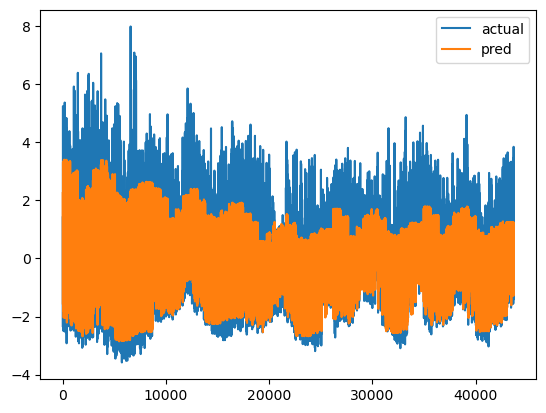

In [36]:
# plot predictions vs actuals
plt.plot(df_test['net+{}'.format(str(i))], label='actual')
plt.plot(df_test['pred_ds+{}'.format(str(i))], label='pred')
plt.legend()
plt.show()